In [5]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Sources of Error

Error can come from many sources when using applying a numerical method:
 - Model/Data Error
 - Truncation Error
 - Floating Point Error
 
**Goal:** Categorize and understand each type of error and explore some simple approaches to analyzing error.

## Model and Data Error

Errors in fundamental formulation
 - Lotka-Volterra - fractional rabbits, no extinctions, etc.
 - Data Error - Inaccuracy in measurement or uncertainties in parameters
 
Unfortunatley we cannot control model and data error directly but we can use methods that may be more robust in the presense of these types of errors.

## Truncation Error

Errors arising from approximating a function with a simpler function (e.g. $sin(x) \approx x$ for $|x| \approx 0$. 

## Floating Point Error

Errors arising from approximating real numbers with finite-precision numbers and arithmetic.

## Basic Definitions

Given a true value of a function $f$ and an approximate solution $\hat{f}$ define:

Absolute Error:  $e = |f - \hat{f}|$

Relative Error:  $r = \frac{e}{|f|} = \frac{|f - \hat{f}|}{|f|}$

Decimal precision p (number of significant digits): $\text{round}(10^{-n} \cdot x) \cdot 10^n$

with $n = \text{floor}(\log_{10} x) + 1 - p$.

In [6]:
f = numpy.exp(1)
f_hat = 2.71

# Error
print "Absolute Error = ", numpy.abs(f - f_hat)
print "Relative Error = ", numpy.abs(f - f_hat) / numpy.abs(f)

# Precision
p = 3
n = numpy.floor(numpy.log10(f_hat)) + 1 - p
print "%s = %s" % (f_hat, numpy.round(10**(-n) * f_hat) * 10**n)

Absolute Error =  0.00828182845905
Relative Error =  0.00304671442539
2.71 = 2.71


## Truncation Error and Taylor's Theorem

**Taylor's Theorem:**  Let $f(x) \in C^{m+1}[a,b]$ and $x_0 \in [a,b]$, then for all $x \in (a,b)$ there exists a number $c = c(x)$ that lies between $x_0$ and $x$ such that

$$ f(x) = T_N(x) + R_N(x)$$

where $T_N(x)$ is the Taylor polynomial approximation

$$T_N(x) = \sum^N_{n=0} \frac{f^{(n)}(x_0)\cdot(x-x_0)^n}{n!}$$

and $R_N(x)$ is the residual (the part of the series we left off)

$$R_N(x) = \frac{f^{(n+1)}(c) \cdot (x - x_0)^{n+1}}{(n+1)!}$$

Another way to think about these results involves replacing $x - x_0$ with $\Delta x$.  The primary idea here is that the residual $R_N(x)$ becomes smaller as $\Delta x \rightarrow 0$.

$$T_N(x) = \sum^N_{n=0} \frac{f^{(n)}(x_0)\cdot\Delta x^n}{n!}$$

and $R_N(x)$ is the residual (the part of the series we left off)

$$R_N(x) = \frac{f^{(n+1)}(c) \cdot \Delta x^{n+1}}{(n+1)!} \leq M \Delta x^{n+1} = O(\Delta x^{n+1})$$

#### Example 1

$f(x) = e^x$ with $x_0 = 0$

Using this we can find expressions for the relative and absolute error as a function of $x$ assuming $N=2$.

$$f'(x) = e^x, ~~~ f''(x) = e^x ~~~ f^{(n)}(x) = e^x$$

$$T_N(x) = \sum^N_{n=0} e^0 \frac{x^n}{n!} ~~~~\Rightarrow ~~~~ T_2(x) = 1 + x + \frac{x^2}{2}$$

$$R_N(x) = e^c \frac{x^{n+1}}{(n+1)!} = e^c \cdot \frac{x^3}{6} ~~~~ \Rightarrow ~~~~ R_2(x) \leq \frac{e^1}{6} \approx 0.5$$

$$e^1 = 2.718\ldots$$

$$T_2(1) = 2.5 \Rightarrow e \approx 0.2 ~~ r \approx 0.1$$



We can also use the package sympy which has the ability to calculate Taylor polynomials built-in!

In [7]:
import sympy
x = sympy.symbols('x')
f = sympy.symbols('f', cls=sympy.Function)

f = sympy.exp(x)
f.series(x0=0, n=3)

1 + x + x**2/2 + O(x**3)

Lets plot this numerically for a section of $x$.

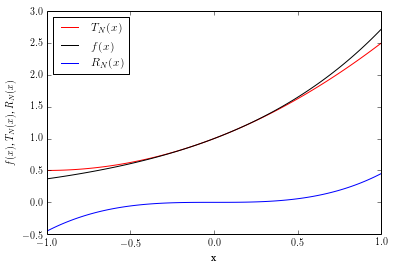

In [23]:
x = numpy.linspace(-1, 1, 100)
T_N = 1.0 + x + x**2 / 2.0
R_N = numpy.exp(1) * x**3 / 6.0

plt.plot(x, T_N, 'r', x, numpy.exp(x), 'k', x, R_N, 'b')
plt.xlabel("x")
plt.ylabel("$f(x)$, $T_N(x)$, $R_N(x)$")
plt.legend(["$T_N(x)$", "$f(x)$", "$R_N(x)$"], loc=2)
plt.show()

#### Example 2

$f(x) = \frac{1}{x} ~~ x_0  = 1$, approximate with $\hat{f}(x) = T_2(x)$

$$f'(x) = -\frac{1}{x^2} ~~ f''(x) = \frac{-2}{x^3} ~~ f^{(n)}(x) = \frac{(-1)^n n!}{x^n}$$

$$T_N(x) = \sum^N_{n=0} (-1)^n (x-1)^n ~~~~ \Rightarrow ~~~~ T_2(x) = 1 - (x - 1) + (x - 1)^2$$

$$R_N(x) = \frac{(-1)^{n+1}}{c^{n+1}} \frac{(x - 1)^{n+1}}{(n+1)!} ~~~~ \Rightarrow ~~~~ R_2(x) = - \frac{(x - 1)^3}{6c^{3}}$$

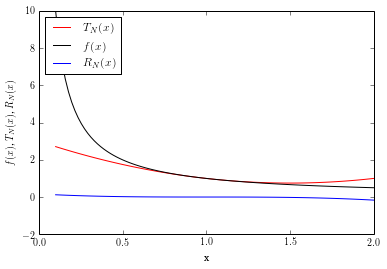

In [29]:
x = numpy.linspace(0.1, 2, 100)
T_N = 1.0 - (x-1) + (x-1)**2
R_N = -(x-1)**3 / (6)

plt.plot(x, T_N, 'r', x, 1.0/x, 'k', x, R_N, 'b')
plt.xlabel("x")
plt.ylabel("$f(x)$, $T_N(x)$, $R_N(x)$")
plt.legend(["$T_N(x)$", "$f(x)$", "$R_N(x)$"], loc=2)
plt.show()

### Symbols and Definitions

Big-O notation: $f(x) = \text{O}(g(x)$ as $x \rightarrow a$ if and only if $|f(x)| \leq M |g(x)|$ as $|x - a| < \delta$ for $M$ and $a$ positive.

In practice we use Big-O notation to say something about how the terms we may have left out of a series might behave.  We saw an example earlier of this with the Taylor's series approximations:

#### Example:
$f(x) = \sin x$ with $x_0 = 0$ then

$$T_N(x) = \sum^N_{n=0} (-1)^{n} \frac{x^{2n+1}}{(2n+1)!}$$

We can actually write $f(x)$ then as

$$f(x) = x - \frac{x^3}{6} + \frac{x^5}{120} + O(x^7)$$

This becomes more useful when we look at this as we did before with $\Delta x$:

$$f(x) = \Delta x - \frac{\Delta x^3}{6} + \frac{\Delta x^5}{120} + O(\Delta x^7)$$

We can also develop rules for error propagation based on Big-O notation:

Let 
$$f(\Delta x) = p(\Delta x) + O(\Delta x^n)$$
$$g(\Delta x) = q(\Delta x) + O(\Delta x^m)$$
$$r = \min(n, m)$$ then

$$f+g = p + q + O(\Delta x^r)$$
$$f \cdot g = p \cdot q + p \cdot O(\Delta x^m) + q \cdot O(\Delta x^n) + O(\Delta x^{n+m}) = p \cdot q + O(\Delta x^r)$$

## Horner's Method for Evaluating Polynomials

Given 

$$P_N(x) = a_0 + a_1 x + a_2 x^2 + \ldots + a_N x^N$$ 

$$P_N(x) = p_1 x^N + p_2 x^{N-1} + p_3 x^{N-2} + \ldots + p_{N+1}$$

want to find best way to evaluate $P_N(x)$.  First consider two ways to write $P_3$:

$$ P_3(x) = p_1 x^3 + p_2 x^2 + p_3 x + p_4$$

and using nested multiplication:

$$ P_3(x) = ((p_1 x + p_2) x + p_3) x + p_4$$




Consider how many operations it takes for each...

$$ P_3(x) = p_1 x^3 + p_2 x^2 + p_3 x + p_4$$

$$P_3(x) = \overbrace{p_1 \cdot x \cdot x \cdot x}^3 + \overbrace{p_2 \cdot x \cdot x}^2 + \overbrace{p_3 \cdot x}^1 + p_4$$

Adding up all the operations we can in general think of this as a pyramid

![Original Count](./images/horners_method_big_count.png)

We can estimate this way that the algorithm written this way will take approximately $O(N^2 / 2)$ operations to complete.

Looking at our other means of evaluation:

$$ P_3(x) = ((p_1 x + p_2) x + p_3) x + p_4$$

Here we find that the method is $O(N)$ (the 2 is usually ignored in these cases).  The important thing is that the first evaluation is $O(N^2)$ and the second $O(N)$!

### Algorithm

We can write Horner's method as
```python
def eval_poly(p, x):
    """Evaluates polynomial given coefficients p at x
    
    Function to evaluate a polynomial in order N operations.  The polynomial is defined as
    
    P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    The value x should be a float.
    """
    
    y = p[0]
    for coefficient in p[1:]:
        y = y * x + coefficient
    
    return y
```

or an alternative version that allows `x` to be a vector of values:
```python
def eval_poly(p, x):
    """Evaluates polynomial given coefficients p at x
    
    Function to evaluate a polynomial in order N operations.  The polynomial is defined as
    
    P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    The value x can by a NumPy ndarray.
    """
    
    y = numpy.ones(x.shape) * p[0]
    for coefficient in p[1:]:
        y = y * x + coefficient
    
    return y
```
This version calculates each `y` value simultaneously making for much faster code!

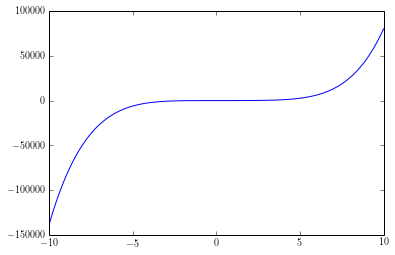

In [48]:
def eval_poly(p, x):
    """Evaluates polynomial given coefficients p at x
    
    Function to evaluate a polynomial in order N operations.  The polynomial is defined as
    
    P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    The value x can by a NumPy ndarray.
    """
    
    y = numpy.ones(x.shape) * p[0]
    for coefficient in p[1:]:
        y = y * x + coefficient
    
    return y

p = [1, -3, 10, 4, 5, 5]
x = numpy.linspace(-10, 10, 100)
plt.plot(x, eval_poly(p, x))